Philippe Joly 2025-08-03

# Original GPU and Streaming GPU Re-PFB Pipeline Output Comparison

This notebook serves as the final test for the Streaming GPU and Original GPU Re-PFB pipeline comparing them with each other and with Mohan's original script.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from os import path
sys.path.append(path.expanduser('~'))

In [3]:
fns = [
    "/project/s/sievers/philj0ly/xcorr_cpu/xcorr_all_ant_4bit_1721361671_14336_64_1788_47_48_og.npz",
    "/project/s/sievers/philj0ly/xcorr_gpu/stream_xcorr_all_ant_4bit_1721361671_14336_64_255_47_48_compare.npz",
    "/project/s/sievers/philj0ly/xcorr_gpu/stream_xcorr_all_ant_4bit_1721361671_1024_64_3576_47_48.npz"
]

# fns = [
#     "/project/s/sievers/philj0ly/xcorr_cpu/xcorr_all_ant_4bit_1721361671_458752_65536_55_47_48_og.npz",
#     "/project/s/sievers/philj0ly/xcorr_gpu/stream_xcorr_all_ant_4bit_1721361671_1024_65536_3576_47_48_1nblock.npz",
#     "/project/s/sievers/philj0ly/xcorr_gpu/stream_xcorr_all_ant_4bit_1721361671_1024_65536_3576_47_48_3nblock_10cut.npz",
#     "/project/s/sievers/philj0ly/xcorr_gpu/stream_xcorr_all_ant_4bit_1721361671_1024_65536_3576_47_48_3nblock_100cut.npz",
#     "/project/s/sievers/philj0ly/xcorr_gpu/stream_xcorr_all_ant_4bit_1721361671_2048_65536_1788_47_48.npz"
# ]
    

data = []
mask = []
missing_fraction = []
chans = []

for fn in fns:
    with np.load(fn) as f:
        data.append(f['data'])
        mask.append(f['mask'])
        missing_fraction.append(f["missing_fraction"])
        chans.append(f['chans'])


In [4]:
df_record = 125e6/2048 # (Hz) frequency range / # of channels
df = df_record/(2**16)
N = 458752
times = N/df_record*np.arange(468)

##  Data Visualisation

In [6]:
spectra = []
freqs = []

for i in range(len(data)):
    spectra.append(np.ma.MaskedArray(data=data[i], mask=mask[i]))
    freqs.append(chans[i]*df) # (Hz)


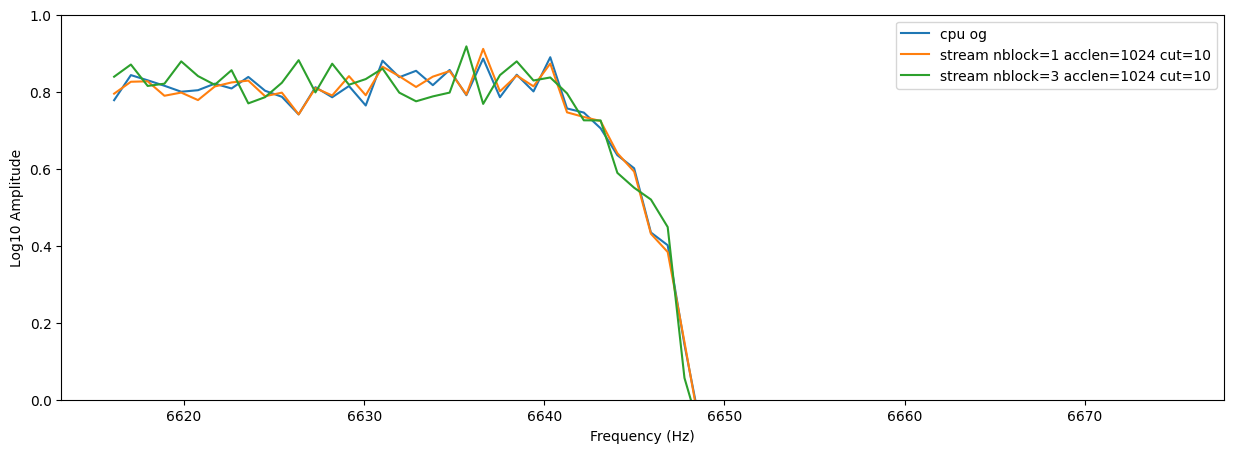

In [9]:
t = 15
# pu = ['gpu og accl=14336 cut=1024', 'stream_comp accl=14336 cut=1024', 'stream accl=1024 cut=10']
pu = ['cpu og', 'stream nblock=1 acclen=1024 cut=10', 'stream nblock=3 acclen=1024 cut=10', 'stream nblock=3 acclen=1024 cut=100', 'stream nblock=3 acclen=2048 cut=100',]

plt.figure(figsize=(15,5))
for i in range(len(fns)):
    # if i != 1:
    plt.plot(freqs[i], np.log10(np.abs(spectra[i][0,0,:,t])), label=pu[i])
    # break
    # plt.plot(freqs[i], np.abs(spectra[i][0,0,:,t]), label=pu[i])


# x0 = 6.79e6
# dx = 100
# plt.xlim(x0,x0+dx)
plt.ylim(0,1)

plt.xlabel('Frequency (Hz)')   
plt.ylabel('Log10 Amplitude')
plt.legend()

plt.show()